# SWARMmpl Clipboard

SWARMmpl Clipboard plots waveforms and spectrograms in the manner used by SWARM (https://volcanoes.usgs.gov/software/swarm/index.shtml).

The Clipboard class extends Matplotlib's Figure class. This allows the user to fully customize the plots using any
method that applies to Figure objects or Axes objects. It offers many improvements over ObsPy's Stream.plot() and
Stream().spectrogram() methods. One major improvement is that Clipboard allows a user to easily plot a waveform and
spectrogram on the same time axes. Additionally, the Clipboard class includes special methods to customize the time
axes, customize settings for the waveform and spectrogram, plot timestamps and catalog events, and many other things.

This tutorial shows the basic functionality of the Clipboard class. The next tutorial explores colormaps for
spectrograms.

In [1]:
import matplotlib.pyplot as plt
from obspy import read, UTCDateTime
from vdapseisutils.core.swarmmpl.clipboard import Clipboard
from vdapseisutils.style import colors as vdap_colors

### Example 1: Clipboard Figure object and Axes
Clipboard is an extension of Matplotlib's Figure object. Create a Clipboard object by passing an ObsPy Stream object.
Clipboard will make a SubFigure for each Trace in Stream. This example shows the default usage of the Clipboard object.


5 Trace(s) in Stream:
AV.GAEA..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GALA..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GANE..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GANO..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GASW..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples


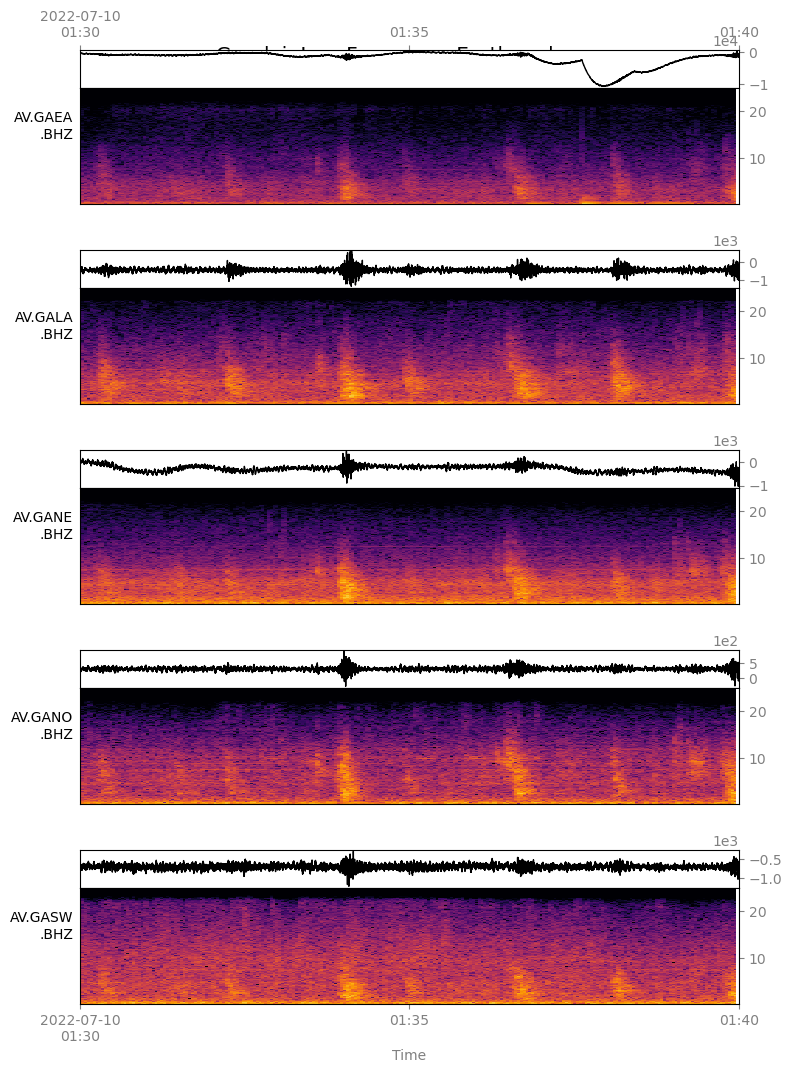

In [2]:
# Read a miniseed file with low frequency earthquakes from Gareloi volcano, Alaska
# Slice the data to a 10 minute window
suptitle = "Gareloi: Low Frequency Earthquakes"
st = read("/home/jwellik/PYTHON/PKG/vdapseisutils/data/waveforms/gareloi_test_data_20220710-010000.mseed")
st = st.slice(UTCDateTime("2022/07/10 01:30:00"), UTCDateTime("2022/07/10 01:39:59.999"))
print(st)

fig = Clipboard(st)  # Clipboard adds axes for the waveform and spectrogram by default
fig.plot()  # Plot the Clipboard
fig.suptitle(suptitle)  # Add a title
plt.show()  # show the plot

### Example 3: A Pensive-like plot

This example shows how to set some basic options and plot timestamps across the axes.
Timestamps can be given as a single object or as a list-like object.
Any time format understood by ObsPy's UTCDateTime (including strings) is understood by Clipboard.

In [3]:
# Read a miniseed file with low frequency earthquakes from Gareloi volcano, Alaska
# Slice the data to a 10 minute window and filter from 1.0 to 10.0 Hz
# This time, filter the data too
suptitle = "Gareloi: Low Frequency Earthquakes"
st = read("/home/jwellik/PYTHON/PKG/vdapseisutils/data/waveforms/gareloi_test_data_20220710-010000.mseed")
st = st.slice(UTCDateTime("2022/07/10 01:30:00"), UTCDateTime("2022/07/10 01:39:59.999"))
st.filter("bandpass", freqmin=1.0, freqmax=10.0)
print(st)

5 Trace(s) in Stream:
AV.GAEA..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GALA..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GANE..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GANO..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples
AV.GASW..BHZ | 2022-07-10T01:30:00.000000Z - 2022-07-10T01:40:00.000000Z | 50.0 Hz, 30001 samples


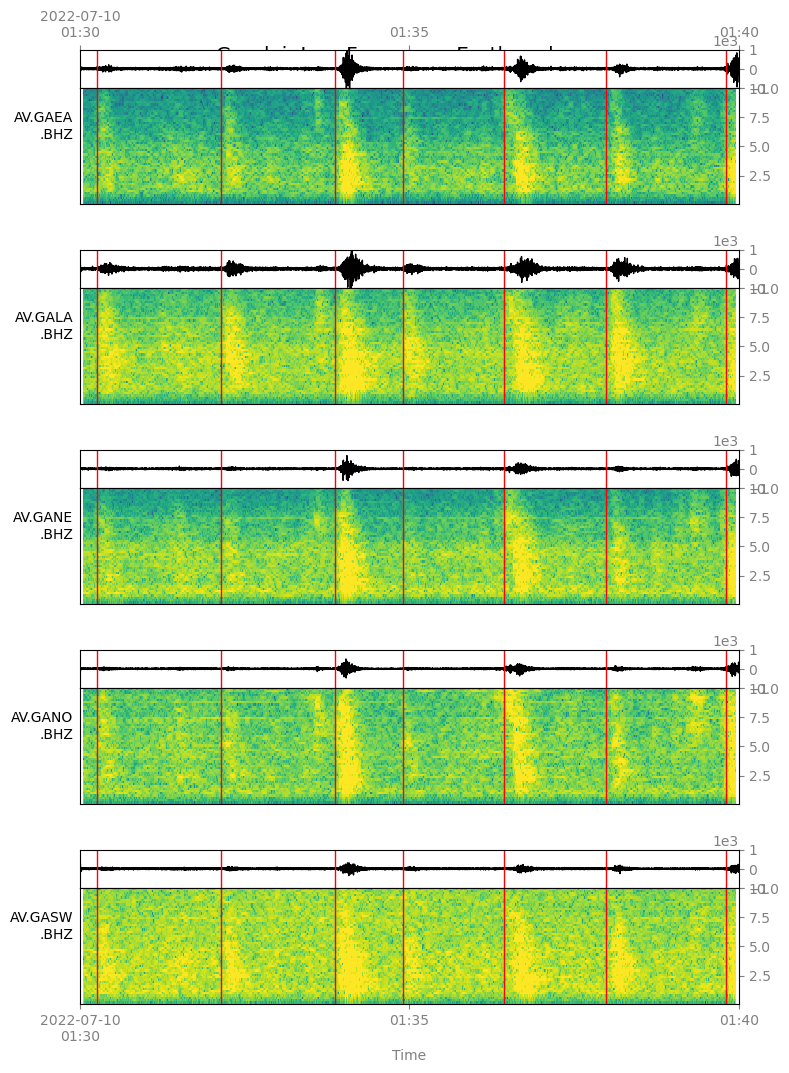

In [4]:
# Create the big plot with labels
fig = Clipboard(st, mode="wg")  # Keep the default mode: waveforms (w) and spectrograms (g)
fig.set_spectrogram(overlap=0.86, cmap=vdap_colors.viridis_u)  # Set the spectrogram overlap (default = 0.86); change the colormap
fig.set_wave(color="k")  # Set the waveform color (default = "k")
fig.plot()  # Plot the Clipboard
fig.axvline("2022/07/10 01:30:15")  # Next add vertical axis spans
fig.axvline(["2022/07/10 01:32:08", "2022/07/10 01:33:52", "2022/07/10 01:34:54",
             "2022/07/10 01:36:26", "2022/07/10 01:37:59", "2022/07/10 01:39:48"],
            color="red")  # Add more vertical axis spans
fig.set_alim([-1000, 1000])  # Set the waveform amplitude limits for all waveform axes
fig.set_flim([0.1, 10.0])  # Set the frequency limits for all spectrogram axes
fig.suptitle(suptitle)  # Add a title
plt.show()  # show the plot

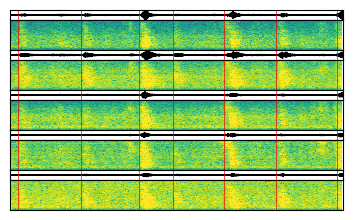

In [5]:
# Create a thumbnail image with no labels
fig = Clipboard(st, mode="wg", figsize=(10.0 / 3, 6.0 / 3))  # Only plot the spectrogram (g)
fig.set_spectrogram(overlap=0.86, cmap=vdap_colors.viridis_u)
fig.plot()
fig.axvline("2022/07/10 01:30:15", color="r", lw=0.5)  # Keep vertical axis spans
fig.axvline(["2022/07/10 01:32:08", "2022/07/10 01:33:52", "2022/07/10 01:34:54",
             "2022/07/10 01:36:26", "2022/07/10 01:37:59", "2022/07/10 01:39:48"], color="red",
            lw=0.5)  # Add more vertical axis spans
fig.set_alim([-1000, 1000])
fig.set_flim([0.1, 10.0])
fig.remove_labels()  # Remove all labels (time axes, xlims, and channel labels)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
fig.suptitle("")  # Remove the title
plt.show()  # show the plot

### Example 3: Relative time axes and Traces

ObsPy's Stream.plot() method will merge Traces with the same traceID, but Clipboard will not. This makes it easy to
create a plot of three different earthquakes on the same channel. Set sync_waves=False so that the time axes are not
synced. Set tick_type="relative" to use the number of seconds since the recording instead of the absolute time. This
example only plots the waveform.

This exmaple also shows how to scroll waveforms forward or backward. This can be useful for aligning phase arrivals or
for aligning seismic with infrasound. When scrolling waveforms forward and backward, Clipboard will preserve the length
of the axes regardless of how much waveform data is available. In this example, the first waveform is scrolled back 0.5
seconds, the second waveform is scrolled forward 0.25 seconds, and the third waveform is scrolled back -0.25 seconds.


In [6]:
st = read("/home/jwellik/PYTHON/PKG/vdapseisutils/data/waveforms/Augustine_test_data_FI.mseed")
print(st)
fig = Clipboard(st, mode="w", sync_waves=False, tick_type="relative")
fig.set_wave(color="k")
fig.plot()
fig.scroll_traces(idx=[0, 1, 2], seconds=[-0.5, 0.25, -0.25])  # Scroll waveforms forward and backward.
# fig.set_flim([0.1, 10.0])
plt.show()  # show the plot

FileNotFoundError: [Errno 2] No such file or directory: '/home/jwellik/PYTHON/PKG/vdapseisutils/data/waveforms/waveform_data/Augustine_test_data_FI.mseed'

### Example 4: Handling missing data

Clipboard handles missing data.

2 Trace(s) in Stream:
VG.TMKS.00.EHZ | 2017-11-25T00:00:00.000001Z - 2017-11-27T00:00:00.000001Z | 100.0 Hz, 17280001 samples (masked)
VG.XXXX.00.EHZ | 2017-11-25T00:00:00.000000Z - 2017-11-26T23:59:59.980000Z | 100.0 Hz, 17279999 samples


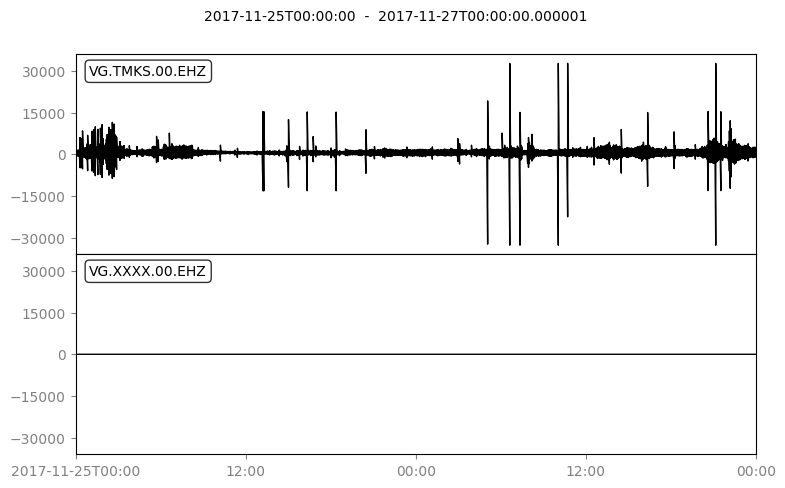

/home/jwellik/PYTHON/PKG/vdapseisutils/vdapseisutils/core/swarmmpl/clipboard.py:260: RuntimeWarning: divide by zero encountered in log10
  Sxx = 10 * np.log10(Sxx[1:, :])


In [ ]:
st = read("/home/jwellik/PYTHON/PKG/vdapseisutils/data/waveforms/Agung_test_data_01.mseed")
st = st.merge()  # .select("VG", "TMKS", "00", "EHZ")
print(st)
st.plot()
fig = Clipboard(st, mode="g")
fig.set_spectrogram(overlap=0.86, cmap=vdap_colors.viridis_u)
fig.set_wave(color="k")  # Default behavior
fig.plot()
fig.suptitle("Agung Example Data")
fig.set_alim([-1000, 1000])
fig.set_flim([0.1, 10.0])
plt.show()  # show the plot
